In [1]:
import numpy as np
import matplotlib as mpl
from math import *
import matplotlib.pyplot as plt
from numpy import *
%matplotlib inline

In [2]:
np.random.seed(1000)

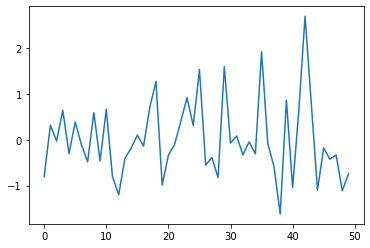

In [3]:
y = np.random.standard_normal(50)
x= range(len(y))
# something familiar to daily returns, and the initial steps of VaR
plt.plot(x,y)
# this basic plot needs to sets of values, i.e., 2 lists

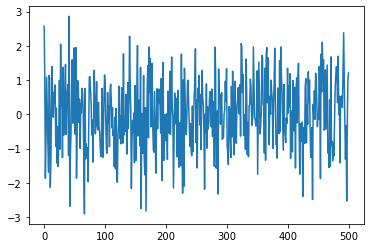

In [4]:
y = np.random.standard_normal(500)
x= range(len(y))
# something familiar to daily returns, and the initial steps of VaR
plt.plot(x,y)



Starting from the basic foundation of asset pricing

The BSM assumption
$S_T = S_0 \exp((r-0.5 \sigma^2)T + \sigma \sqrt{T} z)$


In [5]:
def f_bs_call_value(S0, K, T, Rf, sigma): 
    """ 
    pricing function/formula of Call option on a non-dividend paying stock
        Iputs: 
            S0: float, price of underlying at T=0
            K: float, Strike price
            T: float, Time to maturity (in years)
            Rf: float, Risk free rate of return (as given on Risk Neutral / No Arbitrage assumptions)
            sigma: float, Volatility of the underlying asset (per year)
    """
    """
        Output: float, option value
    """
    from math import log, sqrt, exp
    from scipy import stats
    
    d1 = (log(S0/K) + (Rf + 0.5*sigma**2)*T)/(sigma * sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    Nd1 = stats.norm.cdf(d1,0.0,1.0)
    Nd2 = stats.norm.cdf(d2,0.0,1.0)
    
    val = S0*Nd1 - K* exp(-Rf*T)*Nd2
    return val

In [6]:
f_bs_call_value(100, 105, 1, 0.05, 0.2)

8.021352235143176

In [7]:
#Monte Carlo valuation of European call options with pure Python
# mcs_pure_python.py

from time import time
from math import exp, sqrt, log
from random import gauss, seed
seed(20000)
t0 = time()

# Parameters
S0 = 100. # initial value
K = 105. # strike price
T = 1.0 # maturity
r = 0.05 # riskless short rate
sigma = 0.2 # volatility
M = 100 # number of time steps
dt = T / M # length of time interval
I = 250 # number of paths
# Simulating I paths with M time steps
S = []
for i in range(I):
    path = []
    for t in range(M + 1):
        if t == 0:
            path.append(S0)
        else:
            z = gauss(0.0, 1.0)
            St = path[t - 1] * exp((r - 0.5 * sigma ** 2) * dt + sigma * sqrt(dt) * z)
            path.append(St)
    S.append(path)
# Calculating the Monte Carlo estimator
C0 = exp(-r * T) * sum([max(path[-1] - K, 0) for path in S]) / I
# Results output
tpy = time() - t0
print(f'European Option Value {C0}')
print(f'Duration in Seconds {tpy}')


European Option Value 8.75412551371969
Duration in Seconds 0.08394861221313477


<function matplotlib.pyplot.show(close=None, block=None)>

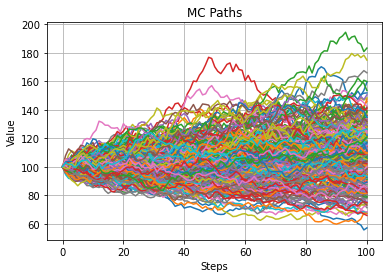

In [8]:
for path in S:
    plt.plot(path, lw = 1.5)
plt.grid(True)
plt.title('MC Paths')
plt.xlabel('Steps')
plt.ylabel('Value')
plt.show

In [9]:
# the same monte carlo, running with better module: Numpy
import math
import numpy as np
from time import time
np.random.seed(20000)

# Parameters
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2
M = 50
dt = T / M
I = 250

In [10]:
# Simulating I paths with M time steps
t0 = time()
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    z = np.random.standard_normal(I) # pseudorandom numbers
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * z)

# vectorized operation per time step over all paths
# Calculating the Monte Carlo estimator
C0 = math.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I
# Results output
tnp1 = time() - t0
print(f'European Option Value {C0}')
print(f'Duration in Seconds {tnp1}')

European Option Value 7.1242190408645625
Duration in Seconds 0.0029985904693603516


<function matplotlib.pyplot.show(close=None, block=None)>

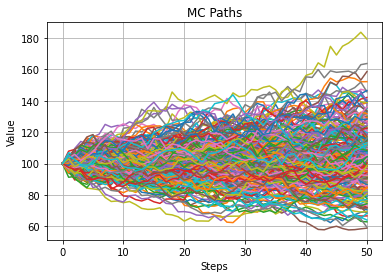

In [11]:
nM = np.transpose(S)
for path in nM:
    plt.plot(path, lw = 1.5)
plt.grid(True)
plt.title('MC Paths')
plt.xlabel('Steps')
plt.ylabel('Value')
plt.show

Text(0, 0.5, 'frequency')

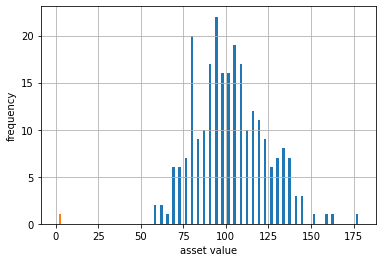

In [12]:

plt.hist((S[-1], 0), bins=50)
plt.grid(True)
plt.xlabel('asset value')
plt.ylabel('frequency')
#plt.ylim(0, 50000)